In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from prophet import Prophet


In [67]:
df = pd.read_csv('C:/Users/swati gamit/OneDrive/Desktop/swati/swati/SEM 6/Mini Project/datasets/lstm.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       474 non-null    object
 1   Traffic   474 non-null    int64 
 2   DateTime  474 non-null    object
 3   Vehicles  474 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 14.9+ KB


In [69]:
# convert object to datetime datatype
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Day       474 non-null    object        
 1   Traffic   474 non-null    int64         
 2   DateTime  474 non-null    datetime64[ns]
 3   Vehicles  474 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 14.9+ KB


In [70]:
print(df)

           Day  Traffic            DateTime  Vehicles
0    Wednesday        2 2015-11-01 00:00:00        15
1    Wednesday        3 2015-11-01 01:00:00        13
2    Wednesday        5 2015-11-01 02:00:00        10
3    Wednesday        3 2015-11-01 03:00:00         7
4    Wednesday        2 2015-11-01 04:00:00         9
..         ...      ...                 ...       ...
469   Saturday        3 2015-11-20 13:00:00        21
470   Saturday        2 2015-11-20 14:00:00        26
471   Saturday        2 2015-11-20 15:00:00        29
472   Saturday        3 2015-11-20 16:00:00        20
473   Saturday        5 2015-11-20 17:00:00        22

[474 rows x 4 columns]


In [71]:
df.head(10)

,Day,Traffic,DateTime,Vehicles
0,Wednesday,2,2015-11-01 00:00:00,15
1,Wednesday,3,2015-11-01 01:00:00,13
2,Wednesday,5,2015-11-01 02:00:00,10
3,Wednesday,3,2015-11-01 03:00:00,7
4,Wednesday,2,2015-11-01 04:00:00,9
5,Wednesday,2,2015-11-01 05:00:00,6
6,Wednesday,4,2015-11-01 06:00:00,9
7,Wednesday,5,2015-11-01 07:00:00,8
8,Wednesday,4,2015-11-01 08:00:00,11
9,Wednesday,5,2015-11-01 09:00:00,12


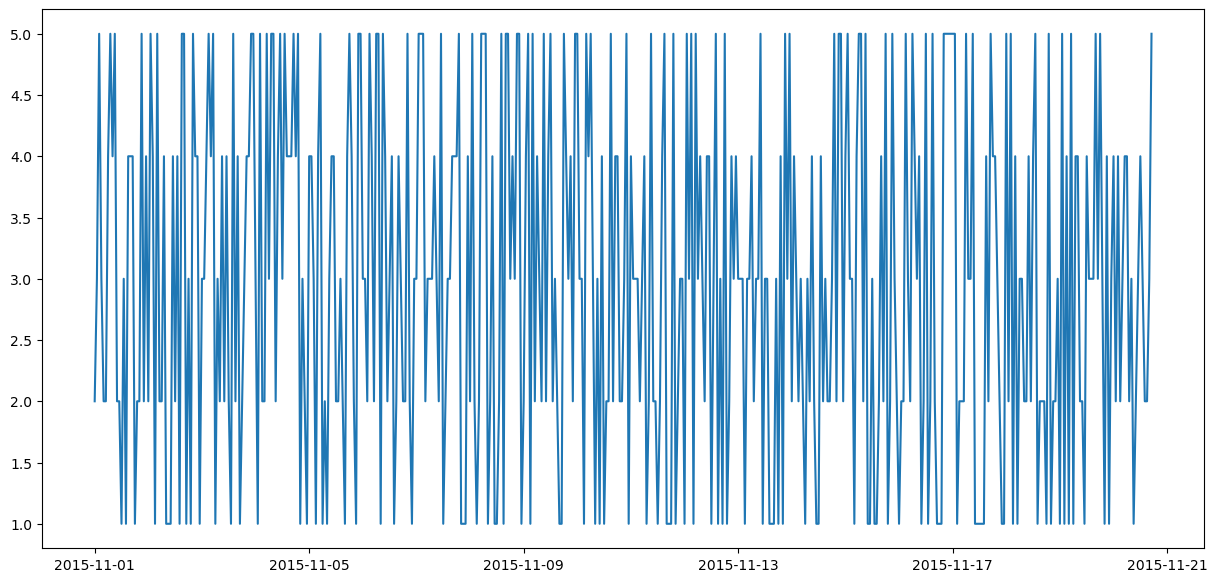

In [72]:
# EDA
plt.figure(figsize=(15,7))
plt.plot(df['DateTime'], df['Traffic'])
plt.show()

In [73]:
df.index = df['DateTime']
df['y'] = df['Traffic']
df.drop(columns=['Day','DateTime','Vehicles'], axis=1, inplace=True)
df = df.resample('D').sum()
df.head()

,Traffic,y
DateTime,,
2015-11-01,72,72
2015-11-02,68,68
2015-11-03,78,78
2015-11-04,83,83
2015-11-05,72,72


In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 2000x700 with 0 Axes>

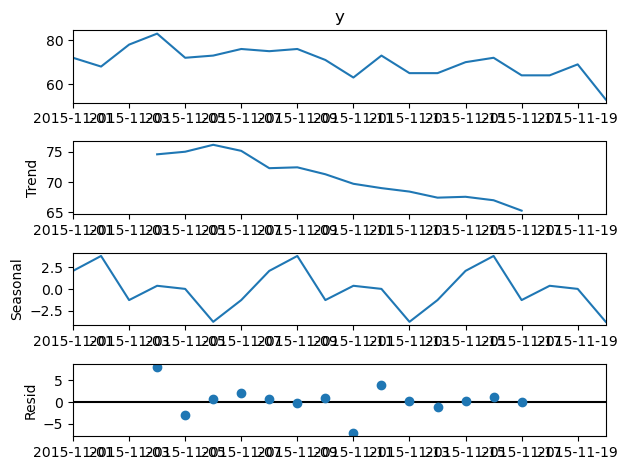

In [78]:
plt.figure(figsize=(20,7))
results = seasonal_decompose(df['y'])
results.plot();

In [80]:
df['ds'] = df.index
df.head()

,Traffic,y,ds
DateTime,,,
2015-11-01,72,72,2015-11-01
2015-11-02,68,68,2015-11-02
2015-11-03,78,78,2015-11-03
2015-11-04,83,83,2015-11-04
2015-11-05,72,72,2015-11-05


In [82]:
size = 15
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=size/len(df), shuffle=False)

In [90]:
train.tail()

,Traffic,y,ds
DateTime,,,
2015-11-01,72,72,2015-11-01
2015-11-02,68,68,2015-11-02
2015-11-03,78,78,2015-11-03
2015-11-04,83,83,2015-11-04
2015-11-05,72,72,2015-11-05


In [91]:
test.head()

,Traffic,y,ds
DateTime,,,
2015-11-06,73,73,2015-11-06
2015-11-07,76,76,2015-11-07
2015-11-08,75,75,2015-11-08
2015-11-09,76,76,2015-11-09
2015-11-10,71,71,2015-11-10


In [92]:
test.tail()

,Traffic,y,ds
DateTime,,,
2015-11-16,72,72,2015-11-16
2015-11-17,64,64,2015-11-17
2015-11-18,64,64,2015-11-18
2015-11-19,69,69,2015-11-19
2015-11-20,53,53,2015-11-20


In [93]:
train.head()

,Traffic,y,ds
DateTime,,,
2015-11-01,72,72,2015-11-01
2015-11-02,68,68,2015-11-02
2015-11-03,78,78,2015-11-03
2015-11-04,83,83,2015-11-04
2015-11-05,72,72,2015-11-05


In [94]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.5)
model.fit(train)

21:11:13 - cmdstanpy - INFO - Chain [1] start processing
21:11:13 - cmdstanpy - INFO - Chain [1] done processing


In [97]:
future = model.make_future_dataframe(periods=30)
future

,ds
0,2015-11-01
1,2015-11-02
2,2015-11-03
3,2015-11-04
4,2015-11-05
5,2015-11-06
6,2015-11-07
7,2015-11-08
8,2015-11-09
9,2015-11-10


In [98]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-01,17.552093,64.594477,76.319368,17.552093,17.552093,52.961057,52.961057,52.961057,52.961057,52.961057,52.961057,0.0,0.0,0.0,70.513150
1,2015-11-02,17.957141,67.596664,79.424843,17.957141,17.957141,55.676313,55.676313,55.676313,55.676313,55.676313,55.676313,0.0,0.0,0.0,73.633455
2,2015-11-03,18.362190,69.502959,81.382351,18.362190,18.362190,57.331108,57.331108,57.331108,57.331108,57.331108,57.331108,0.0,0.0,0.0,75.693298
3,2015-11-04,18.767238,71.244047,82.301295,18.767238,18.767238,57.887227,57.887227,57.887227,57.887227,57.887227,57.887227,0.0,0.0,0.0,76.654464
4,2015-11-05,19.172286,70.909582,82.602556,19.172286,19.172286,57.331697,57.331697,57.331697,57.331697,57.331697,57.331697,0.0,0.0,0.0,76.503983


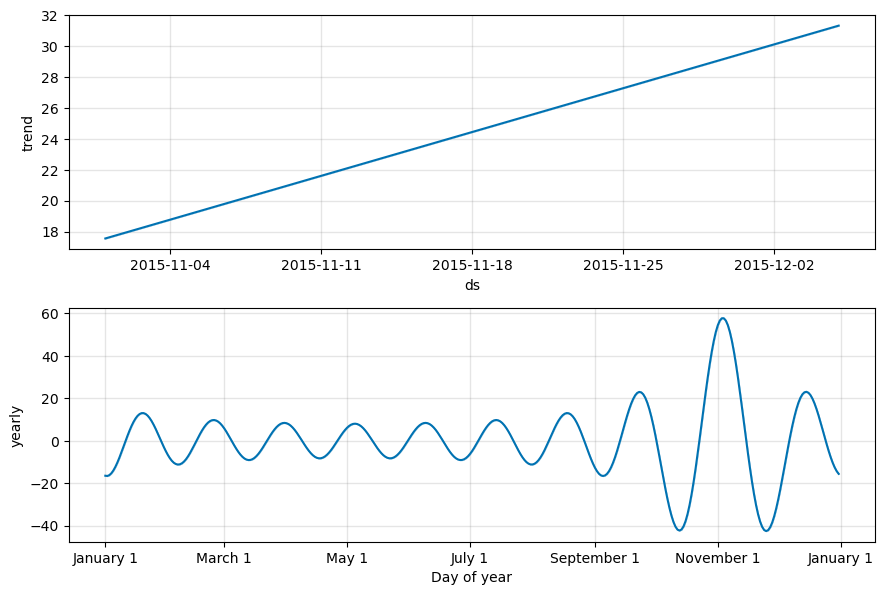

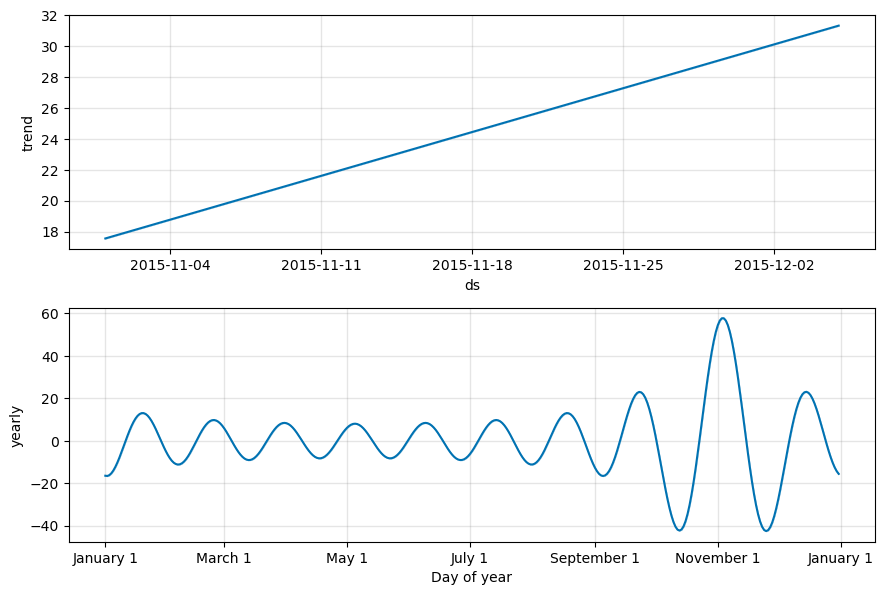

In [99]:
model.plot_components(forecast)

In [100]:
pred = forecast.iloc[-60:, :]
len(pred)

35

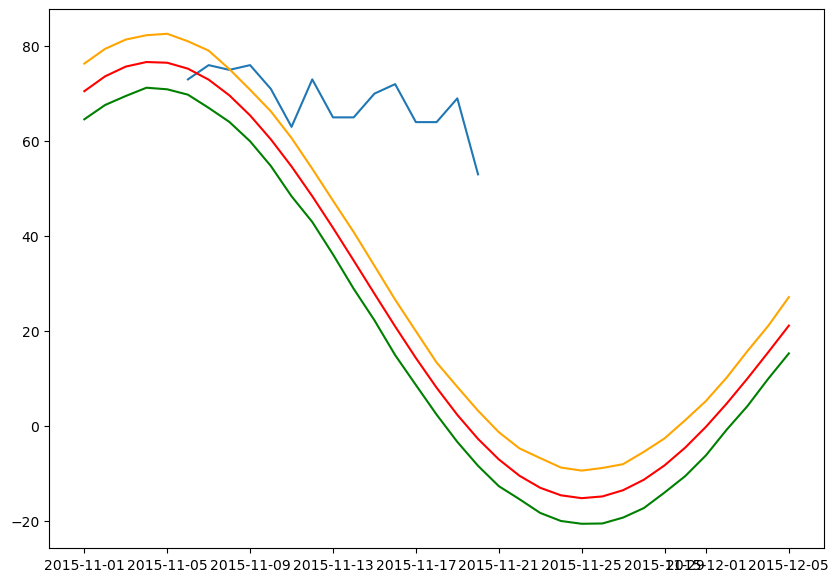

In [101]:
# test results
plt.figure(figsize=(10,7))
plt.plot(test['ds'], test['y'])
plt.plot(pred['ds'], pred['yhat'], color='red')
plt.plot(pred['ds'], pred['yhat_lower'], color='green')
plt.plot(pred['ds'], pred['yhat_upper'], color='orange')
plt.show()

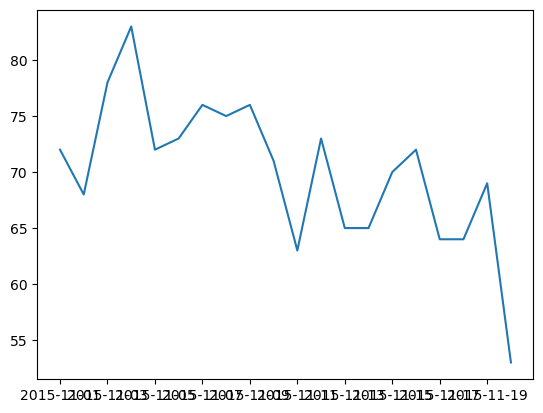

In [102]:
# input data
plt.plot(df['ds'], df['y'])
plt.show()

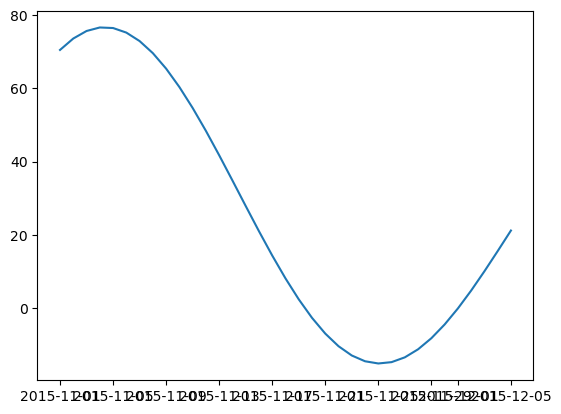

In [103]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()

In [105]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.5)
model.fit(df)
future = model.make_future_dataframe(periods=200)
forecast = model.predict(future)
forecast.head()

21:15:18 - cmdstanpy - INFO - Chain [1] start processing
21:15:18 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-11-01,10.310094,67.591845,76.869384,10.310094,10.310094,61.996712,61.996712,61.996712,1.976641,1.976641,1.976641,60.020071,60.020071,60.020071,0.0,0.0,0.0,72.306806
1,2015-11-02,11.481849,69.172182,79.376371,11.481849,11.481849,62.596868,62.596868,62.596868,1.525168,1.525168,1.525168,61.071700,61.071700,61.071700,0.0,0.0,0.0,74.078717
2,2015-11-03,12.653603,69.615950,79.756509,12.653603,12.653603,62.096443,62.096443,62.096443,0.651185,0.651185,0.651185,61.445258,61.445258,61.445258,0.0,0.0,0.0,74.750047
3,2015-11-04,13.825358,70.440504,80.092044,13.825358,13.825358,61.188374,61.188374,61.188374,-0.018106,-0.018106,-0.018106,61.206480,61.206480,61.206480,0.0,0.0,0.0,75.013732
4,2015-11-05,14.997113,72.372949,81.797165,14.997113,14.997113,62.243140,62.243140,62.243140,1.813600,1.813600,1.813600,60.429541,60.429541,60.429541,0.0,0.0,0.0,77.240253


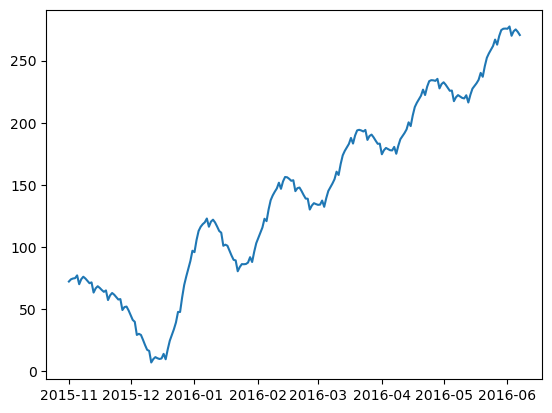

In [106]:
# forecast data
plt.plot(forecast['ds'], forecast['yhat'])
plt.show()